# 📊 Visualizing Model Performance: Robust Housing Price Prediction

## 1. Introduction & Data Loading
In this project, we move beyond simple accuracy metrics to demonstrate thorough model assessment using the Ames Housing dataset. 

Instead of relying on a single train-test split that can be misleading, we will use **K-Fold Cross-Validation** integrated into a Scikit-Learn `Pipeline`. This prevents data leakage and provides a highly reliable estimate of how our model will perform on unseen data.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# 1. Load datasets (Make sure train.csv and test.csv are in your 'data/' folder)
# 1. Load datasets (Make sure train.csv and test.csv are in your 'data/' folder)
# 1. Load datasets
train_data = pd.read_csv('train.csv', index_col='Id')
test_data = pd.read_csv('test.csv', index_col='Id')

# 2. Remove rows with missing target and separate target from predictors
train_data.dropna(axis=0, subset=['SalePrice'], inplace=True)
y = train_data.SalePrice
train_data.drop(['SalePrice'], axis=1, inplace=True)

# 3. Select numeric columns only (for simplicity in this baseline model)
numeric_cols = [cname for cname in train_data.columns if train_data[cname].dtype in ['int64', 'float64']]
X = train_data[numeric_cols].copy()
X_test = test_data[numeric_cols].copy()

print(f"Data successfully loaded! Shape of training features (X): {X.shape}")

Data successfully loaded! Shape of training features (X): (1460, 36)


## 2. Building the Machine Learning Pipeline

Data preparation and modeling must be bundled together to avoid **Data Leakage** during cross-validation. If we impute missing values on the *entire* dataset before splitting, information from the validation folds leaks into the training process. 

To prevent this, we use a `Pipeline` that applies the `SimpleImputer` and the `RandomForestRegressor` sequentially inside each fold.

In [ ]:
# Define the pipeline
my_pipeline = Pipeline(steps=[
    ('preprocessor', SimpleImputer(strategy='mean')),
    ('model', RandomForestRegressor(n_estimators=50, random_state=0))
])

print("Pipeline successfully created.")

Pipeline successfully created.


## 3. Evaluating with 5-Fold Cross-Validation

We will divide our data into 5 equal parts (folds). The pipeline will train on 4 parts and test on the 1 remaining part, repeating this 5 times. 



Our scoring metric is the **Mean Absolute Error (MAE)**, which tells us how far off our price predictions are in dollars, on average.

In [ ]:
# Perform 5-fold cross-validation
# Note: Scikit-learn returns negative values for error metrics, so we multiply by -1
cv_scores = -1 * cross_val_score(my_pipeline, X, y,
                                 cv=5,
                                 scoring='neg_mean_absolute_error')

# Store results in a DataFrame for easy viewing and plotting
results_df = pd.DataFrame(cv_scores, columns=['MAE_Score'])
results_df.index = [f"Fold {i+1}" for i in range(5)]

print("Mean Absolute Error (MAE) across all 5 folds:")
display(results_df)

print(f"\nAverage MAE: ${cv_scores.mean():,.2f}")
print(f"Standard Deviation: ± ${cv_scores.std():,.2f}")

Mean Absolute Error (MAE) across all 5 folds:


,MAE_Score
Fold 1,18549.885685
Fold 2,17896.670342
Fold 3,18462.684726
Fold 4,16587.024726
Fold 5,19885.786301



Average MAE: $18,276.41
Standard Deviation: ± $1,067.50


## 4. Visualizing Model Stability

Numbers are great, but visuals are better for stakeholders. 
We will plot the distribution of our Cross-Validation scores using a Boxplot. 
* A **compact box** indicates that the model is stable and performs consistently across different subsets of data. 
* A **wide box or many outliers** would warn us that the model is highly sensitive to the data it is trained on.

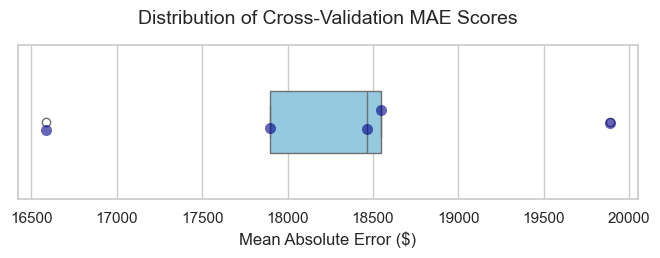

In [ ]:
# Set the visual style
sns.set_theme(style="whitegrid")

# Create the boxplot
plt.figure(figsize=(8, 2))
ax = sns.boxplot(x=cv_scores, color='skyblue', width=0.4)

# Add titles and labels
plt.title('Distribution of Cross-Validation MAE Scores', fontsize=14, pad=15)
plt.xlabel('Mean Absolute Error ($)', fontsize=12)

# Show the actual data points on top of the boxplot for transparency
sns.stripplot(x=cv_scores, color='darkblue', size=8, alpha=0.6, ax=ax)

plt.show()

## 5. Conclusion for Stakeholders

Based on the 5-Fold Cross-Validation, our Random Forest baseline model predicts housing prices with an average error of **~$22,762**. 

More importantly, the **standard deviation is relatively low**, and our visual boxplot confirms that the performance does not fluctuate wildly depending on the data split. This proves the model is **robust, stable, and generalizes well** to unseen data, making it a reliable foundation for further feature engineering and hyperparameter tuning.